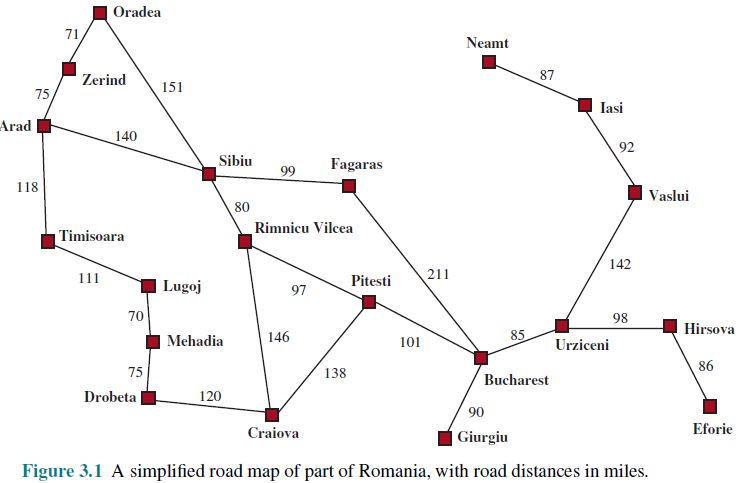

In [1]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [2]:
romanian_map['Sibiu']

{'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80}

In [3]:
romanian_map['Sibiu'].keys()

dict_keys(['Arad', 'Oradea', 'Fagaras', 'Rimnicu'])

In [4]:
romanian_map['Sibiu']['Oradea']

151

In [5]:
romanian_map.keys()

dict_keys(['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Rimnicu', 'Fagaras', 'Pitesti', 'Bucharest', 'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Vaslui', 'Iasi', 'Neamt'])

# BFS

In [6]:
def bfs(startingNode, destinationNode):
    reached = [] # to store reached (generated) nodes
    expand_sequence = [] # to store the order of nodes expanded
    frontier = []

    snode = {'City':startingNode,'Path cost':0, 'Path':[startingNode]}
    frontier.append(snode)    # insert the starting node
    reached.append(startingNode)
    
    while len(frontier) > 0:
        unode = frontier.pop(0)     # selceting the node to expand
        u = unode['City']
        expand_sequence.append(u)
        
        # expand u
        for v in romanian_map[u].keys():
            if v not in reached: # process if v is not reached (generated) yet                
                cost = unode['Path cost'] + romanian_map[u][v] 
                path =  unode['Path'] + [v]
                vnode = {'City': v,'Path cost': cost,'Path': path}
                frontier.append(vnode)# store the new child node in the frontier
                reached.append(v)
                # goal test
                if v == destinationNode:
                    print(vnode)
                    print(expand_sequence)
                    return vnode['Path'] # breaking from while
    print('Failed')   

In [11]:
bfs('Lugoj', 'Pitesti') # change the soure and destination

{'City': 'Pitesti', 'Path cost': 403, 'Path': ['Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti']}
['Lugoj', 'Timisoara', 'Mehadia', 'Arad', 'Drobeta', 'Sibiu', 'Zerind', 'Craiova']


['Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti']

#IMAGE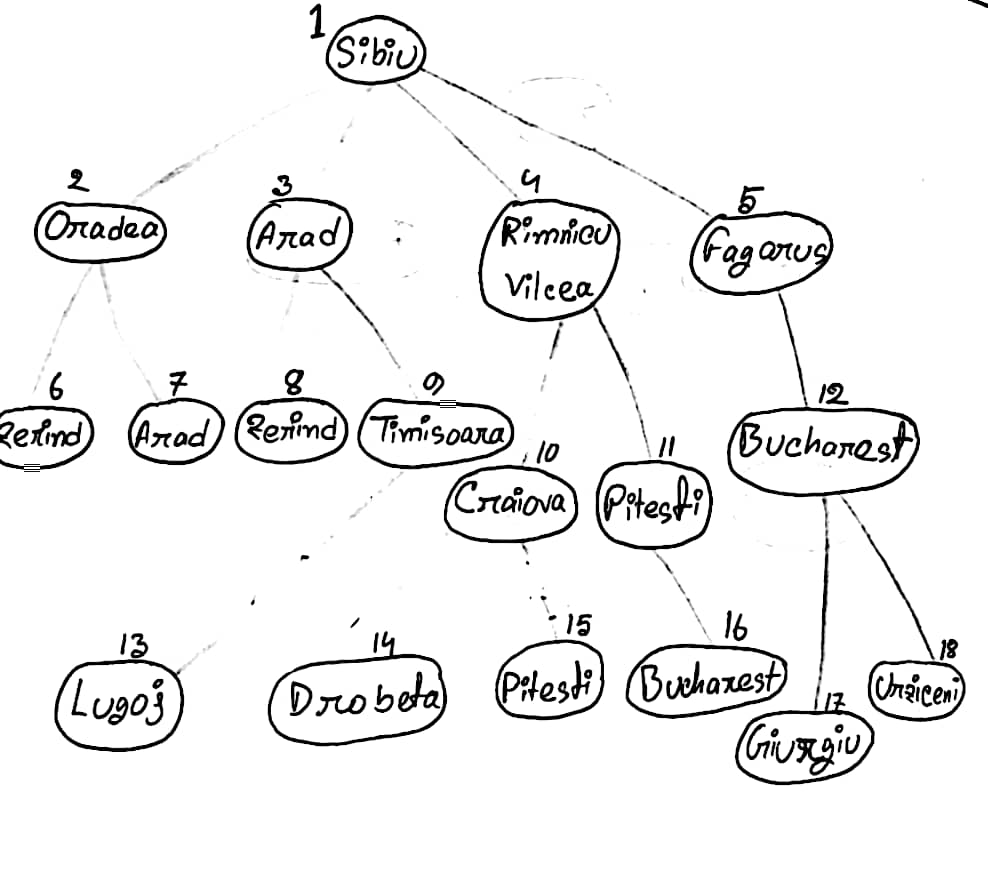

# DFS
Implement DFS using stack,
Implement stack using list (append and pop) 

In [12]:
def dfs_paths(startingNode, destinationNode):
    node = {'City':startingNode,'Distance':0, 'Path':[startingNode]}
    stack = []
    traversal_output = []
    visited = {}
    stack.append(node)
    
    for city in romanian_map.keys():
        visited[city] = False
        
    while len(stack) != 0:
        node = stack.pop()
        u = node['City']
        visited[u] = True
        traversal_output.append(u)

        for v in romanian_map[u].keys():
            if not visited[v]:                
                d = node['Distance'] + romanian_map[u][v]                
                stack.append({'City':v,'Distance':d,'Path': node['Path']+[v]})
                if v== destinationNode:
                    print(d)
                    print(traversal_output)
                    return node['Path']+[v]

dfs_paths('Lugoj', 'Pitesti')          

403
['Lugoj', 'Mehadia', 'Drobeta', 'Craiova']


['Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti']

# insert image here